In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from mido import MidiFile
import os

In [2]:
test_path = 'samples/music/classical'

files = os.listdir(test_path)
mpb = []
tpb = []
f_files = []
rolls = []
for f in files[:10]:
    t = 0
    discard = False
    mpb_i = None
    mid_temp = MidiFile(os.path.join(test_path, f), clip=True)
    notes = {
        n: {'start': [], 'end': [], 'velocity': []}
        for n in range(128)
    }
    for msg in mid_temp.tracks[0]:
        if not msg.is_meta:
            if msg.type == 'note_on':
                t += msg.time
                if msg.velocity > 0:
                    notes[msg.note]['start'].append(t // mid_temp.ticks_per_beat)
                    notes[msg.note]['velocity'].append(msg.velocity)
                else:
                    notes[msg.note]['end'].append(t // mid_temp.ticks_per_beat)
        else:
            if msg.type == 'set_tempo':
                if mpb_i is None:
                    mpb_i = msg.tempo
                else:
                    discard = True
            elif msg.type == 'time_signature':
                if msg.numerator != 4 and  msg.denominator != 4:
                    print(msg)
    
    if not discard:
        f_files.append(f) 
        tpb.append(mid_temp.ticks_per_beat)
        mpb.append(mpb_i)
        piano_roll = np.zeros((128, t // mid_temp.ticks_per_beat))
        for n, events in notes.items():
            if len(events['start']) > 0:
                for n_ini, n_end, v in zip(events['start'], events['end'], events['velocity']):
                    piano_roll[n, n_ini:n_end] = v / 127
        rolls.append(piano_roll)

In [3]:
from datasets import MotifDataset
from models import MusicTransformer
from torch.utils.data import DataLoader

motif_size=128
batch_size = 16

dataset = MotifDataset(motif_size=motif_size)
train_loader = DataLoader(
    dataset, batch_size, True, num_workers=1
)
val_loader = DataLoader(
    dataset, batch_size, num_workers=1
)

net = MusicTransformer([128])
n_param = sum(
    p.numel() for p in net.parameters() if p.requires_grad
)
print('Transformer ready {:d} parameters'.format(n_param))
try:
    net.load_model('weights/jazz.pt')
except IOError:
    net.fit(train_loader, val_loader, epochs=100, patience=50)

542 piano rolls loaded
Transformer ready 165120 parameters
Epoch num |  train  |   val   |   xent   |   mse    |    l1    |   0mse   |   0l1    |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
----------|---------|---------|----------|----------|----------|----------|----------|
Init      |  3.5308 |  3.5304 |   3.5304 |   0.4731 |   0.5191 |   0.0145 |   0.0145 | 5s
Epoch 000 |  3.4696 |  3.4018 |   3.4018 |   0.4651 |   0.5121 |   0.0145 |   0.0145 | 8s                                                                           

Epoch 012 |  1.9802 |  1.9107 |   1.9107 |   0.3149 |   0.3819 |   0.0145 |   0.0145 | 8s                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
Epoch 013 |  1.8526 |  1.7860 |   1.7860 |   0.2971 |   0.3646 |   0.0145 |   0.0145 | 8s                                                                                                                                                                                                                                                                                                                                                                             

Epoch 025 |  0.3200 |  0.2795 |   0.2795 |   0.0622 |   0.1061 |   0.0145 |   0.0145 | 8s                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
Epoch 026 |  0.2574 |  0.2230 |   0.2230 |   0.0483 |   0.0895 |   0.0145 |   0.0145 | 8s                                                                                                                                                                                                                                                                                                                                                                             

Epoch 038 |  0.0787 |  0.0735 |   0.0735 |   0.0144 |   0.0318 |   0.0145 |   0.0145 | 8s                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
Epoch 039 |  0.0825 |  0.0725 |   0.0725 |   0.0143 |   0.0316 |   0.0145 |   0.0145 | 8s                                                                                                                                                                                                                                                                                                                                                                             

Epoch 051 |  0.0653 |  0.0674 |   0.0674 |   0.0140 |   0.0293 |   0.0145 |   0.0145 | 8s                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
Epoch 052 |  0.0712 |  0.0672 |   0.0672 |   0.0140 |   0.0292 |   0.0145 |   0.0145 | 8s                                                                                                                                                                                                                                                                                                                                                                             

Epoch 064 |  0.0691 |  0.0659 |   0.0659 |   0.0140 |   0.0295 |   0.0145 |   0.0145 | 8s                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
Epoch 065 |  0.0696 |  0.0658 |   0.0658 |   0.0140 |   0.0296 |   0.0145 |   0.0145 | 8s                                                                                                                                                                                                                                                                                                                                                  

Epoch 077 |  0.0669 |  0.0650 |   0.0650 |   0.0140 |   0.0294 |   0.0145 |   0.0145 | 8s                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
Epoch 078 |  0.0695 |  0.0649 |   0.0649 |   0.0140 |   0.0294 |   0.0145 |   0.0145 | 8s                                                                                                                                                                                                                                                                                                                                                  

Epoch 090 |  0.0669 |  0.0646 |   0.0646 |   0.0140 |   0.0294 |   0.0145 |   0.0145 | 8s                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
Epoch 091 |  0.0664 |  0.0645 |   0.0645 |   0.0140 |   0.0293 |   0.0145 |   0.0145 | 8s                                                                                                                                                                                                                                                                                                                       

In [4]:
net.save_model('weights/all.pt')

<IPython.core.display.Javascript object>


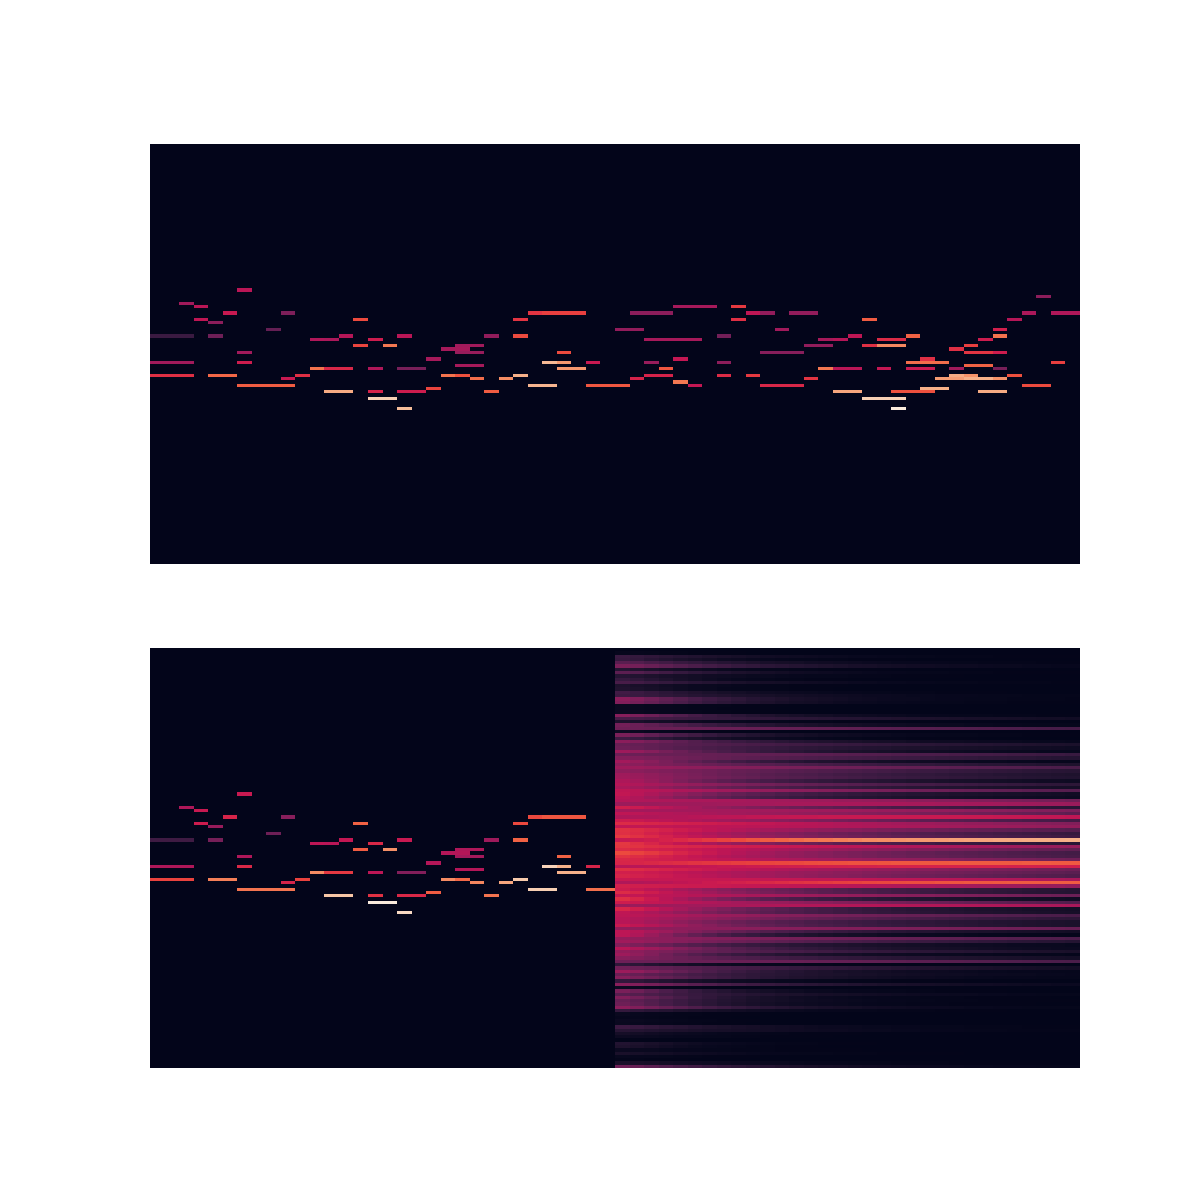

[]

In [5]:
motif_size=32
random_roll = rolls[np.random.randint(0, len(rolls))]
random_motif = random_roll[:, :motif_size].astype(np.float32)
song = random_roll[:, :motif_size + 32]
pred_song = net.song(random_motif, 32)
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
sn.heatmap(song, cbar=False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.subplot(2, 1, 2)
sn.heatmap(pred_song, cbar=False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])